# Tarefa Aula 2

In [1]:
import json
import pandas as pd
import requests
import geopandas as gpd
from matplotlib import pyplot as plt
import os
import time

In [3]:
plt.style.use('dark_background')

Integrantes do grupo

In [4]:
integrantes = [
    'MATHEUS AMARAL MÕES',
    'REGINALDO DE MIRANDA TEODORO',
    'CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI',
]

Carregar arquivos com empresas

In [5]:
empresas_todas = pd.read_excel('EMPRESAS_Brasília T7.xlsx', index_col = 'ID')
print(f'Total de empresas: {empresas_todas.shape[0]}')
empresas_todas.head()

Total de empresas: 1000


,CEP,Faturamento 2019,Gestor da Empresa
ID,,,
1,06330-190,26844,ALEXANDRE DE ALMEIDA FONSECA
2,06386-000,3058,ALINE BRAGA LAKISS GUSMÃO
3,06345-030,22126,ANA PAULA GARUTTI DA SILVA
4,06365-210,47253,ANA PAULA GONÇALVES DOS SANTOS
5,06329-350,39199,BRENO PREISCHARDT ZANFERDINI DE ALMEIDA


Selecionar empresas dos integrantes do grupo

In [6]:
empresas = empresas_todas[empresas_todas['Gestor da Empresa'].isin(integrantes)]

print(f'Total de empresas: {empresas.shape[0]}')

empresas.head()

Total de empresas: 94


,CEP,Faturamento 2019,Gestor da Empresa
ID,,,
6,06361-230,20249,CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI
29,25270-540,29167,MATHEUS AMARAL MÕES
30,25040-240,22619,REGINALDO DE MIRANDA TEODORO
38,25220-750,38333,CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI
61,03977-080,40275,MATHEUS AMARAL MÕES


## Tarefa 1
**Descreva o processo de geocodificação realizado para suas empresas (quantas empresas no total e quantas foram localizadas “corretamente”). Apresente as empresas não localizadas em uma tabela, contendo os CEPs não encontrados.**

* Realizado uma cópia da base original “EMPRESAS_Brasília T7.xlsx” com o nome “EMPRESAS_Brasília T7_CEP_Ajustado v1.xlsx”. Resumo das colunas originais:

![image.png](ImagensGeoencoding/Imagem1.png)

* Criada a coluna “CEP Ajustado” contendo a seguinte fórmula {"CEP - " & B2 & " - Brazil"}. Resumo das colunas após nova inclusão:

![image.png](ImagensGeoencoding/Imagem2.png)

* Após os ajustes acima, o arquivo foi salvo como “Texto (separado por tabulações) (*.txt)” com o nome: “EMPRESAS_Brasília T7_CEP_Ajustado v1.txt”.

* Foi utilizado o Google Earth Pro para a geocodificação da base acima:
* Menu “Arquivo –> Importar” com os seguintes parâmetros:

![image.png](ImagensGeoencoding/Imagem3.png)
![image.png](ImagensGeoencoding/Imagem4.png)
![image.png](ImagensGeoencoding/Imagem5.png)
![image.png](ImagensGeoencoding/Imagem6.png)

* De um total de 94 CEPs, 8 não foram localizados pelo Google Earth Pro de forma automática:

* Destes 8 CEPs não localizados pelo Google Earth Pro, 6 foram encontrados através do site “http://www.buscacep.correios.com.br/sistemas/buscacep/” e dois não foram localizados. Estes 6 CEPs encontrados foram atualizados no Google Earth Pro através da opção “Reparar” (imagem acima). Seguem informações dos endereços consultados no site acima:

![image.png](ImagensGeoencoding/Imagem7.png)

#### Endereços vindos do Geoencoding realizado pelo GoogleEarth

In [123]:
# Shapefile exportado do Google Earth
enderecos_df = gpd.read_file('EmpresasGoogleEarth/empresas_brasília t7_cep_ajustado v3.shp', index_col = 0)
enderecos_df['NAME'] = enderecos_df['NAME'].astype(int)

# Unir com empresas
empresas_enderecos  = enderecos_df.merge(empresas, left_on = 'NAME', right_index = True)
empresas_gpd = empresas_enderecos

print(f'Formato Endereços: {empresas_enderecos.shape}')

empresas_enderecos .head()


Formato Endereços: (92, 7)


,NAME,ALTITUDEMO,ID,geometry,CEP,Faturamento 2019,Gestor da Empresa
0,262,relativeToGround,262,POINT Z (-46.64795 -23.53370 118.28680),01216-000,12551,CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI
1,326,relativeToGround,326,POINT Z (-46.59469 -23.49051 262.71479),02204-000,27086,CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI
2,317,relativeToGround,317,POINT Z (-46.57892 -23.44528 64.70883),02326-210,7159,MATHEUS AMARAL MÕES
3,294,relativeToGround,294,POINT Z (-46.42455 -23.55560 315.61707),02676-030,32410,CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI
4,870,relativeToGround,870,POINT Z (-46.69427 -23.46105 205.86769),02847-060,21365,CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI


#### Carregar Municípios

In [124]:
# Dados dos municipios
municipios = gpd.read_file('Munic_brasil/munic_brasil.shp', index_col = 'ID').set_index('ID')

# Shape File com paises do mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

print(f'Formato Municícpios: {municipios.shape}')
municipios.head()

Formato Municícpios: (5560, 13)


,AREA,GEOCODIGO,NOME,NOMECAPS,UF,CODUF,REGIAO,MESORREGIA,MICRORREGI,RM,POP2004,DENSDEMO,geometry
ID,,,,,,,,,,,,,
2,76680.43,1300201,Atalaia do Norte,ATALAIA DO NORTE,AM,13,Norte,SUDOESTE AMAZONENSE,ALTO SOLIMOES,None,11023,0.14,"POLYGON ((-73.80098 -7.11146, -73.79617 -7.102..."
1,5474.51,1200336,Mâncio Lima,MANCIO LIMA,AC,12,Norte,VALE DO JURUA,CRUZEIRO DO SUL,None,11883,2.17,"POLYGON ((-73.80098 -7.11146, -73.73762 -7.134..."
12,8832.70,1300607,Benjamin Constant,BENJAMIN CONSTANT,AM,13,Norte,SUDOESTE AMAZONENSE,ALTO SOLIMOES,None,25542,2.89,"POLYGON ((-70.13532 -4.28746, -70.12815 -4.293..."
23,3236.87,1304062,Tabatinga,TABATINGA,AM,13,Norte,SUDOESTE AMAZONENSE,ALTO SOLIMOES,None,42652,13.18,"POLYGON ((-69.95428 -4.26597, -69.95329 -4.253..."
24,12363.85,1303700,Santo Antônio do Içá,SANTO ANTONIO DO ICA,AM,13,Norte,SUDOESTE AMAZONENSE,ALTO SOLIMOES,None,33421,2.70,"POLYGON ((-69.83709 -3.68623, -69.82498 -3.620..."


Filtrar municipios da região

In [125]:
municipios = municipios[municipios['UF'].isin(['RS', 'SP', 'RJ', 'SC', 'PR'])]

print(f'Formato Municícpios: {municipios.shape}')

Formato Municícpios: (1925, 13)


Pelo plot mundial é possível notar que todas as empresas se encontram no Brasil

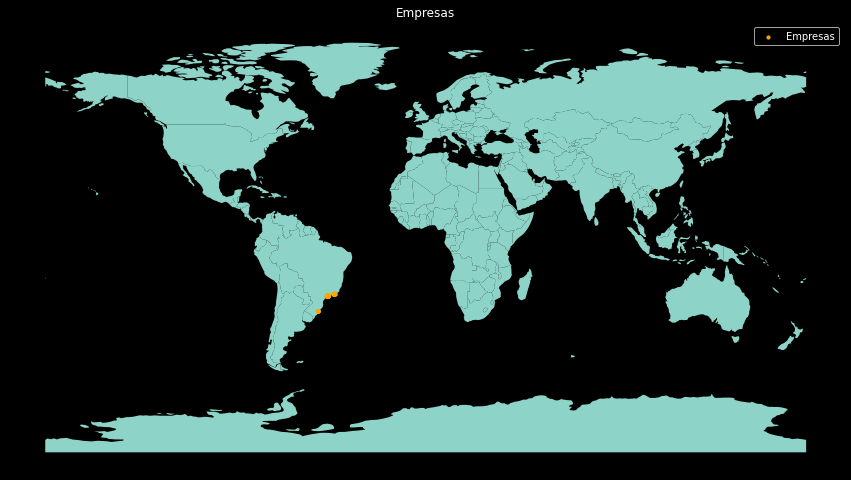

In [127]:
ax = world.plot(figsize = (15,15))

empresas_gpd.plot(color = 'orange', label = 'Empresas', markersize = 10, ax = ax)

ax.set_axis_off()
ax.legend()
ax.set_title('Empresas')
plt.show()

#### Join Espacial - Empresas <> Municipios

In [128]:
# Realizar join espacial
joined = gpd.sjoin(empresas_gpd, municipios, op="within")

print(f'Formato Joined: {joined.shape}')
joined.head()

/Users/matheus/Documents/MBA FGV/Estatística Espacial/venv-espac/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  


Formato Joined: (92, 20)


,NAME,ALTITUDEMO,ID,geometry,CEP,Faturamento 2019,Gestor da Empresa,index_right,AREA,GEOCODIGO,NOME,NOMECAPS,UF,CODUF,REGIAO,MESORREGIA,MICRORREGI,RM,POP2004,DENSDEMO
0,262,relativeToGround,262,POINT Z (-46.64795 -23.53370 118.28680),01216-000,12551,CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI,2701,1526.68,3550308,São Paulo,SAO PAULO,SP,35,Sudeste,METROPOLITANA DE SAO PAULO,SAO PAULO,SAO PAULO,10838581,7099.45
1,326,relativeToGround,326,POINT Z (-46.59469 -23.49051 262.71479),02204-000,27086,CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI,2701,1526.68,3550308,São Paulo,SAO PAULO,SP,35,Sudeste,METROPOLITANA DE SAO PAULO,SAO PAULO,SAO PAULO,10838581,7099.45
2,317,relativeToGround,317,POINT Z (-46.57892 -23.44528 64.70883),02326-210,7159,MATHEUS AMARAL MÕES,2701,1526.68,3550308,São Paulo,SAO PAULO,SP,35,Sudeste,METROPOLITANA DE SAO PAULO,SAO PAULO,SAO PAULO,10838581,7099.45
3,294,relativeToGround,294,POINT Z (-46.42455 -23.55560 315.61707),02676-030,32410,CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI,2701,1526.68,3550308,São Paulo,SAO PAULO,SP,35,Sudeste,METROPOLITANA DE SAO PAULO,SAO PAULO,SAO PAULO,10838581,7099.45
4,870,relativeToGround,870,POINT Z (-46.69427 -23.46105 205.86769),02847-060,21365,CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI,2701,1526.68,3550308,São Paulo,SAO PAULO,SP,35,Sudeste,METROPOLITANA DE SAO PAULO,SAO PAULO,SAO PAULO,10838581,7099.45


O processo de spatial join resultou em duas empresas a menos que o Conjunto de empresas com localização definida (93), indicando que duas empresa não foram encontradas no processo de spatial join.

## Tarefa 2
**Apresente um mapa contendo o tema de municípios do Brasil e o tema com as suas empresas localizadas.**

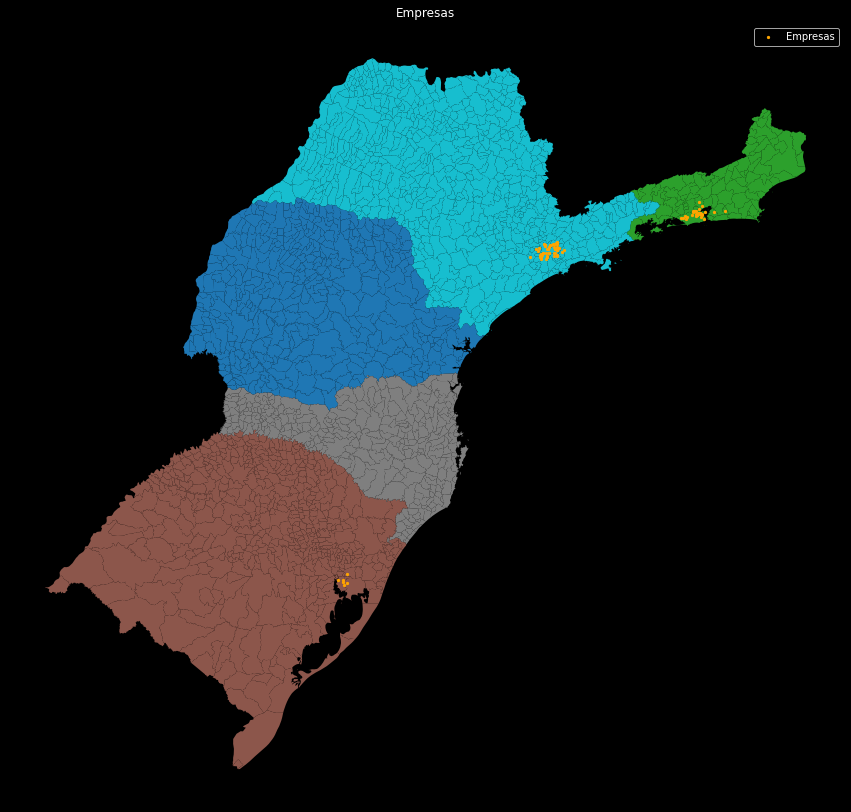

In [129]:
ax = municipios.plot(figsize = (15,15), column = 'UF', legend = True)

empresas_gpd.plot(ax = ax, color = 'orange', label = 'Empresas', markersize = 5)
ax.set_axis_off()
ax.legend()
ax.set_title('Empresas')
plt.show()

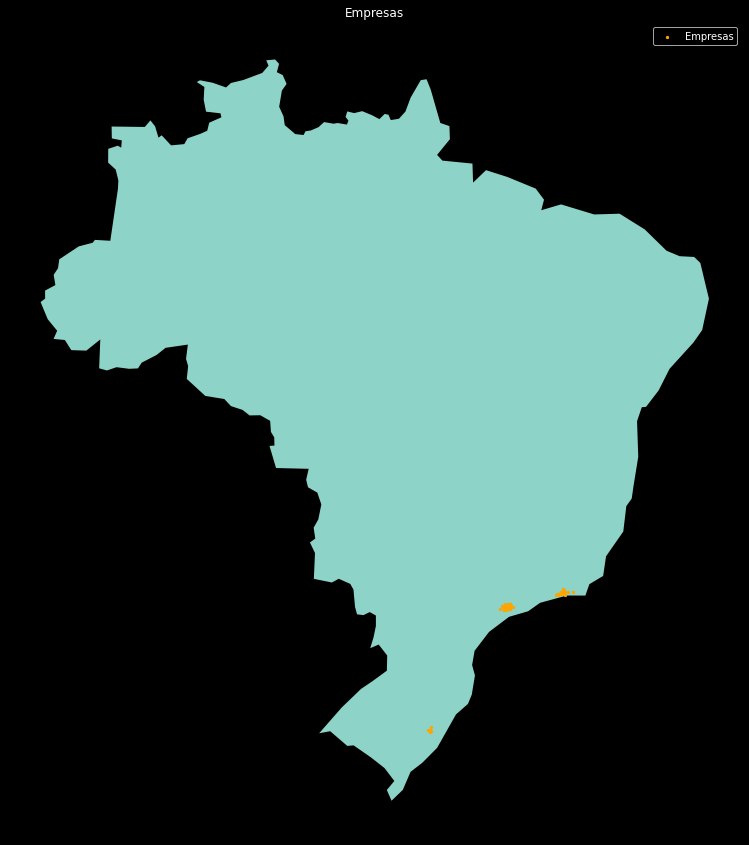

In [130]:
ax = world[world.name == 'Brazil'].plot(figsize = (15,15))

empresas_gpd.plot(ax = ax, color = 'orange', label = 'Empresas', markersize = 5)
ax.set_axis_off()
ax.legend()
ax.set_title('Empresas')
plt.show()

## Tarefa 3
**Apresente um mapa contendo os municípios do Brasil de acordo com a quantidade de empresas que eles contêm. Utilize algum método de classificação (legenda do mapa) que lhe parecer razoável. Justifique essa escolha.**


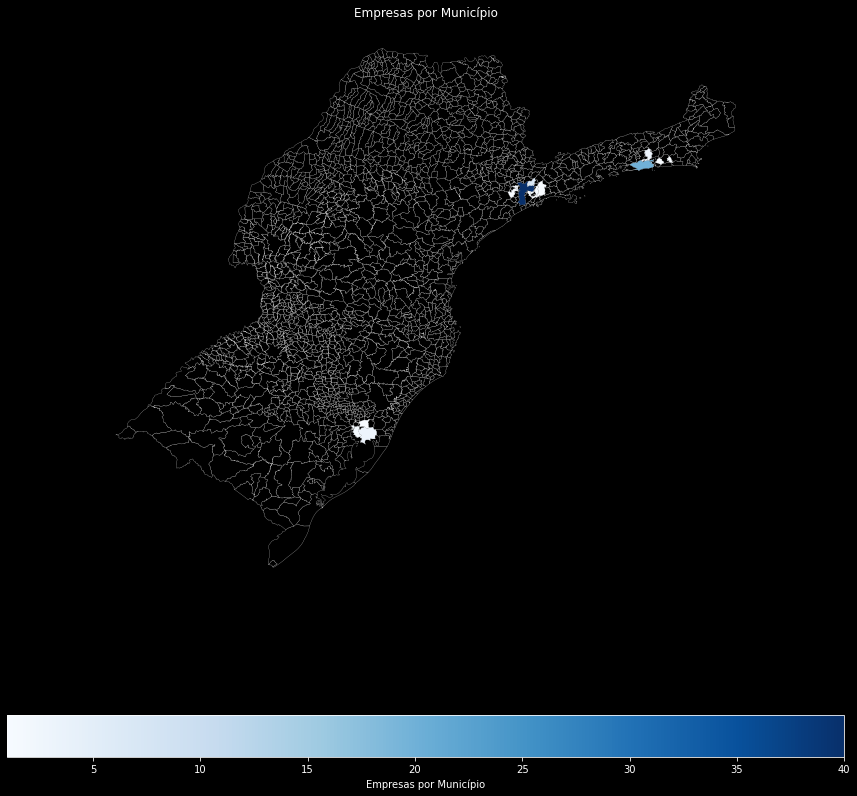

In [131]:
merged = pd.merge(
            municipios,
            joined.groupby('index_right').size().to_frame(),
            left_on= 'ID',
            right_index = True,
            how = 'left'
        )

# Contorno dos muncipios
ax = municipios.plot(figsize = (15,15),color='black', edgecolor = 'white', linewidth=.2)

# Quantidade de empresas por municipio
merged.plot(column = 0, legend = True, cmap='Blues',figsize = (10,15), ax = ax, 
            legend_kwds={'label': "Empresas por Município", 'orientation': "horizontal"}
           )

ax.set_axis_off()

ax.set_title('Empresas por Município')

plt.show()

Empresas por Município

In [132]:
(merged[['NOME', 'UF', 0]]
     .dropna()
     .sort_values(0, ascending = False)
     .astype({0:'int'})
     .rename(columns = {0:'Empresas por Municípios'})
     
)

,NOME,UF,Empresas por Municípios
ID,,,
2701,São Paulo,SP,40
6098,Rio de Janeiro,RJ,20
2777,Guarulhos,SP,7
3665,Mesquita,RJ,3
3688,Duque de Caxias,RJ,3
1343,Viamão,RS,3
2662,Barueri,SP,2
6117,Porto Alegre,RS,2
2787,Mauá,SP,2


## Tarefa 4
**Apresente um outro mapa contendo os municípios do Brasil de acordo com a quantidade de empresas que eles contêm. Utilize algum outro método de classificação (legenda do mapa) que lhe parecer razoável. Justifique essa escolha.**

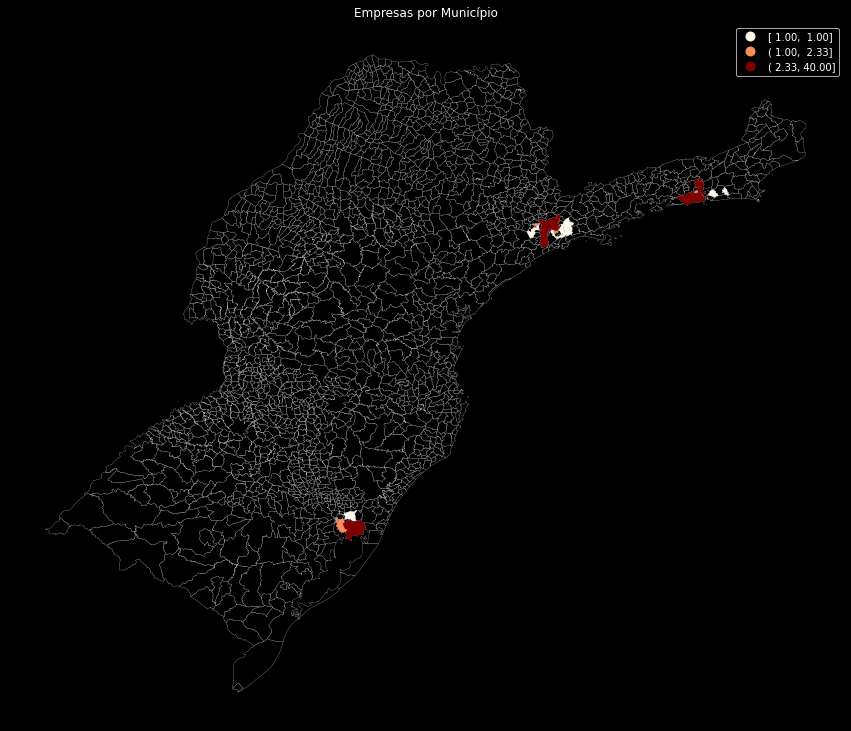

In [133]:
merged = pd.merge(
            municipios,
            joined.groupby('index_right').size().astype(pd.Int16Dtype()).to_frame(),
            left_on= 'ID',
            right_index = True,
            how = 'left'
        )

ax = merged.plot(figsize = (15,15),color='black', edgecolor = 'white', linewidth=.2)

ax = merged.plot(column = 0, legend = True, cmap='OrRd',k = 3,scheme='quantiles', ax = ax
            
           )

ax.set_axis_off()

ax.set_title('Empresas por Município')

plt.show()

## Tarefa 5
**Apresente um mapa contendo os municípios do Brasil de acordo com o faturamento acumulado. Utilize algum método de classificação (legenda do mapa) que lhe parecer razoável. Justifique essa escolha.**

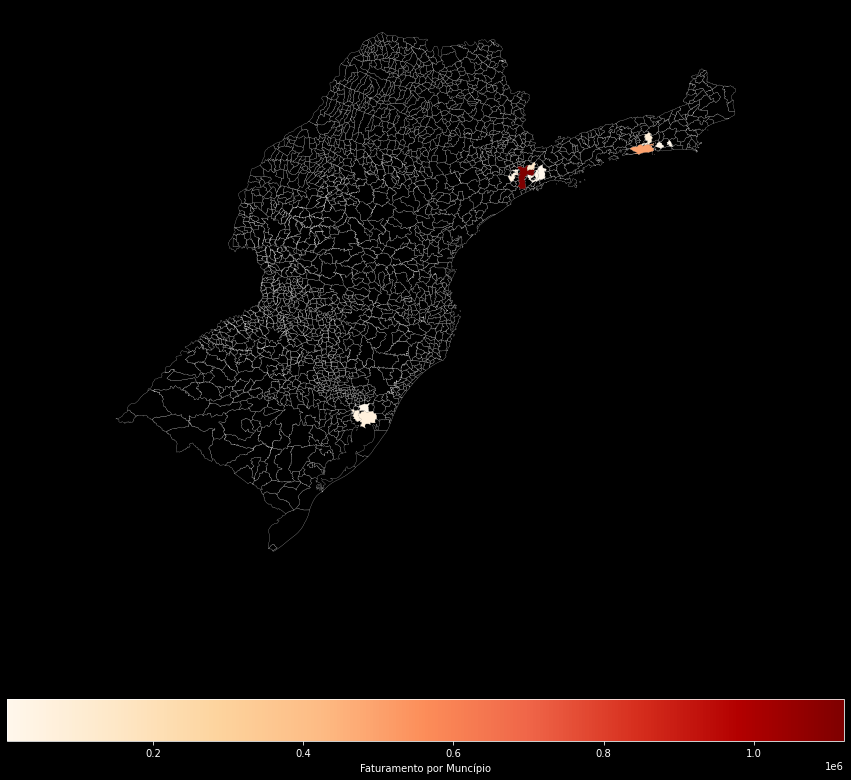

In [134]:
merged = pd.merge(
            municipios,
            joined.groupby('index_right').sum()[['Faturamento 2019']],
            left_on= 'ID',
            right_index = True,
            how = 'left'
        )

ax = merged.plot(figsize = (15,15),color='black', edgecolor = 'white', linewidth=.2)
# ax = world[world.name == 'Brazil'].plot(figsize = (10,15),color='black', edgecolor = 'white')

merged.plot(column = 'Faturamento 2019', legend = True, ax = ax, cmap='OrRd',
            legend_kwds={'label': "Faturamento por Muncípio", 'orientation': "horizontal"}
           )

ax.set_axis_off()

plt.show()

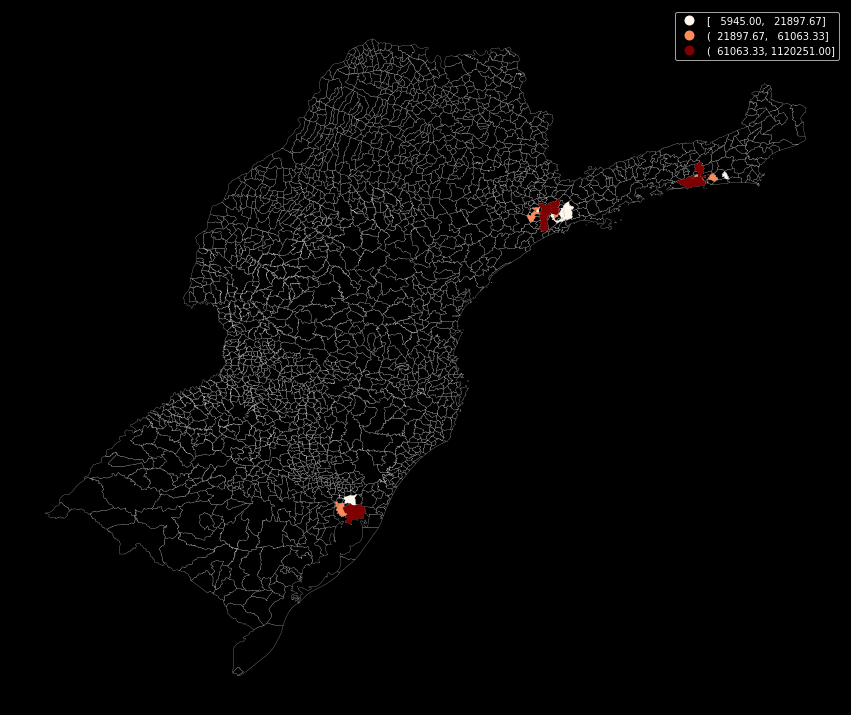

In [135]:
merged = pd.merge(
            municipios,
            joined.groupby('index_right').sum()[['Faturamento 2019']],
            left_on= 'ID',
            right_index = True,
            how = 'left'
        )

ax = merged.plot(figsize = (15,15),color='black', edgecolor = 'white', linewidth=.2)
# ax = world[world.name == 'Brazil'].plot(figsize = (10,15),color='black', edgecolor = 'white')

ax = merged.plot(column = 'Faturamento 2019', legend = True, cmap='OrRd',k = 3,scheme='quantiles', ax = ax
            
           )

ax.set_axis_off()

plt.show()

## Pergunta 6
**Quais são os 5 municípios do Brasil com maior número de empresas que são gerenciadas por você? Qual é o número de empresas por município desses 5 primeiros do ranking? (se houver empate na 5ª posição, informar todas nessa situação)**

In [136]:
merged = pd.merge(
            municipios,
            joined.groupby('index_right').size().to_frame(),
            left_on= 'ID',
            right_index = True,
            how = 'left'
        )

sorted_arr = (merged[['NOME', 'UF', 0]]
     .dropna()
     .sort_values(0, ascending = False)
     .astype({0:'int'})
     .rename(columns = {0:'Empresas por Municípios'})
     
)

sorted_arr[sorted_arr['Empresas por Municípios'] >= sorted_arr['Empresas por Municípios'].iloc[4]]

,NOME,UF,Empresas por Municípios
ID,,,
2701,São Paulo,SP,40
6098,Rio de Janeiro,RJ,20
2777,Guarulhos,SP,7
3665,Mesquita,RJ,3
3688,Duque de Caxias,RJ,3
1343,Viamão,RS,3


## Pergunta 7
**Dos municípios com clientes na sua carteira, qual deles apresenta o menor faturamento acumulado em 2019? Qual é esse faturamento?**

In [137]:
sorted_arr = joined.groupby('NOME').sum()['Faturamento 2019'].sort_values()

print(f'Estado de menor faturamento: {sorted_arr.index[0]}. Faturamento do estado: {sorted_arr[0]}')

Estado de menor faturamento: Santo André. Faturamento do estado: 5945


In [138]:
sorted_arr = joined.groupby('NOME').sum()['Faturamento 2019'].sort_values(ascending=False)

print(f'Estado de maior faturamento: {sorted_arr.index[0]}. Faturamento do estado: {sorted_arr[0]}')

Estado de maior faturamento: São Paulo. Faturamento do estado: 1120251


## Tarefa 8 (bônus)
**Apresente seu shapefile de municípios no Google Earth (ou Google Earth Pro) destacando em cores diferentes (ou através da altura do polígono) o faturamento acumulado em 2019.**

In [139]:
merged = pd.merge(
            municipios,
            joined.groupby('NOME').sum()[['Faturamento 2019']],
            left_on= 'NOME',
            right_index = True,
            how = 'left'
        )
merged.dropna().to_file('empresas/Empresas.shp')

![GoogleEarth](./GoogleEarth2.jpg)

## Tarefa 9
**Apresente um mapa (View) contendo o tema de setores censitários das UFs que contém empresas da sua carteira e o tema com as suas empresas localizadas.**

Carregar setores censitários

In [140]:
setores = gpd.read_file('sp_rj_rs_setores_censitarios/sp_rj_rs.shp')

setores['CD_GEOCODI'] = setores['CD_GEOCODI'].astype('int')

print(setores.shape)

setores.head()

(119342, 2)


,CD_GEOCODI,geometry
0,430040605070005,"POLYGON ((-55.80521 -29.79662, -55.80020 -29.7..."
1,430040605070006,"POLYGON ((-55.80265 -29.79551, -55.80127 -29.7..."
2,430040605070007,"POLYGON ((-55.80190 -29.79312, -55.79894 -29.7..."
3,430040605070008,"POLYGON ((-55.80102 -29.79077, -55.79818 -29.7..."
4,430040605080001,"POLYGON ((-55.78522 -29.76099, -55.78462 -29.7..."


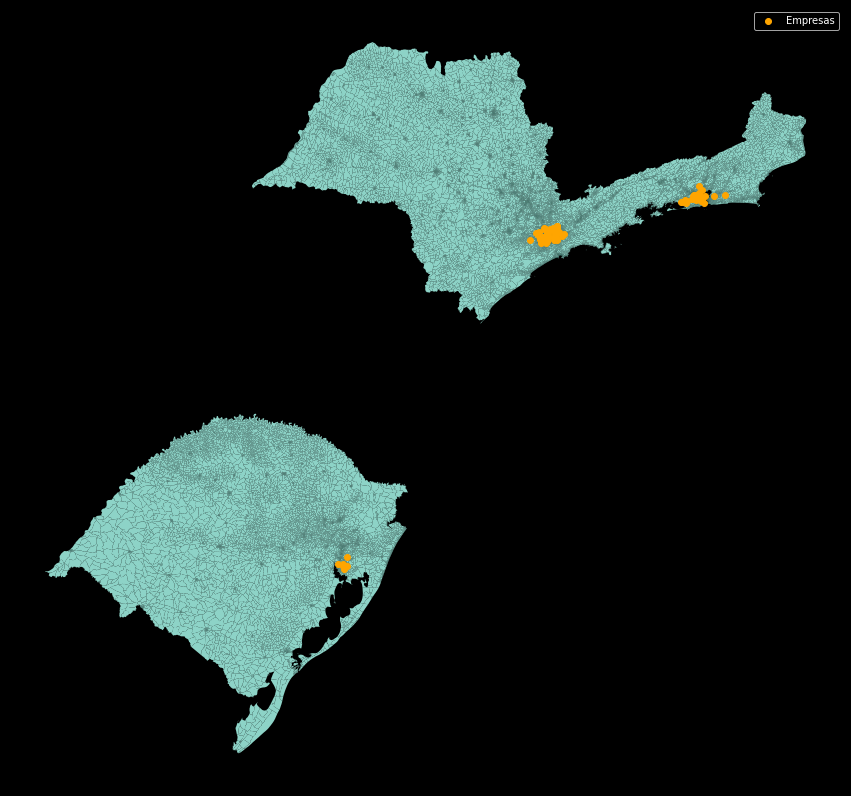

In [141]:
ax = setores.plot(figsize = (15,15))

joined.plot(ax = ax, color = 'orange', label = 'Empresas')
ax.set_axis_off()
ax.legend()

plt.show()

## Tarefa 10
**Apresente um mapa contendo os setores censitários das UFs da sua carteira de acordo com a quantidade de empresas que eles contêm. Utilize algum método de classificação (legenda do mapa) que lhe parecer razoável. Apresente também a tabela com os códigos dos setores censitários e a quantidade de empresas de cada um.**

In [142]:
# Realizar join espacial
join_setores = gpd.sjoin(
    empresas_gpd, 
    setores, 
    op="within"
    )

print(f'Formato Joined: {join_setores.shape}')
join_setores.head()

/Users/matheus/Documents/MBA FGV/Estatística Espacial/venv-espac/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  """


Formato Joined: (92, 9)


,NAME,ALTITUDEMO,ID,geometry,CEP,Faturamento 2019,Gestor da Empresa,index_right,CD_GEOCODI
0,262,relativeToGround,262,POINT Z (-46.64795 -23.53370 118.28680),01216-000,12551,CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI,108241,355030869000017
1,326,relativeToGround,326,POINT Z (-46.59469 -23.49051 262.71479),02204-000,27086,CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI,112483,355030892000153
2,317,relativeToGround,317,POINT Z (-46.57892 -23.44528 64.70883),02326-210,7159,MATHEUS AMARAL MÕES,110665,355030881000295
3,294,relativeToGround,294,POINT Z (-46.42455 -23.55560 315.61707),02676-030,32410,CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI,100435,355030831000094
4,870,relativeToGround,870,POINT Z (-46.69427 -23.46105 205.86769),02847-060,21365,CARLOS EDUARDO DIAS PINHEIRO MÉRIDA ONTI,95605,355030811000232


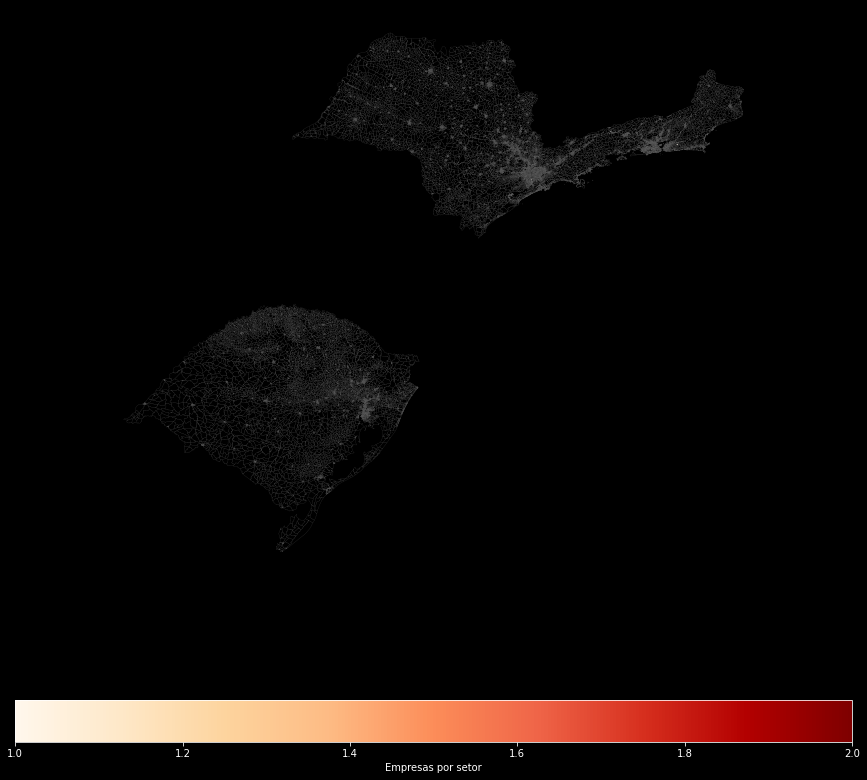

In [143]:
merged = pd.merge(
            setores,
            join_setores.groupby('CD_GEOCODI').size().to_frame(),
            left_on= 'CD_GEOCODI',
            right_index = True,
            how = 'left'
        )

ax = merged.plot(figsize = (15, 15),color='black', edgecolor = 'gray', linewidth=.1)
# ax = world[world.name == 'Brazil'].plot(figsize = (10,15),color='black', edgecolor = 'white')

ax = merged.dropna().plot(column = 0, legend = True, cmap='OrRd', ax = ax,
                         legend_kwds={'label': "Empresas por setor", 'orientation': "horizontal"})

ax.set_axis_off()

plt.show()

## Pergunta 11
**Qual é a média e a variância de moradores em domicílios particulares permanentes dos setores censitários que contêm empresas da sua carteira de clientes? Descreva como obteve essas informações (tabelas e racional das fórmulas e procedimentos).**

In [144]:
pastas = {
    'RJ':'Base informa‡oes setores2010 universo RJ',
    'RS':'Base informa‡oes setores2010 universo RS',
    'SP2':'Base informa‡oes setores2010 universo SP_Exceto_Capital',
    'SP1':'SP Capital'
    }

* Arquivo Básico (planilha Básico_UF.xls ou Básico_UF.csv)
* V002: Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes

Selecionar setores com empresas da base

In [145]:
setores_base = setores[setores['CD_GEOCODI'].isin(join_setores['CD_GEOCODI'])]

print(setores_base.shape)

(91, 2)


Ler arquivos FTP

In [146]:
arq_basico = []

for i in pastas:
    arq_basico.append(
        pd.read_excel(
            os.path.join('DadosCenso' ,pastas[i], 'EXCEL', f'Basico_{i}.xls'), index_col = 'Cod_setor'
        )
    )
    
    
censo_basico = pd.concat(arq_basico)

Selecionar regiões censitárias com empresa da base

In [147]:
censo_basico_selecao = censo_basico[
    censo_basico.index.isin(join_setores['CD_GEOCODI'])
    ]

Resultados

Média: 812.23 
Desvio Parão: 467.85


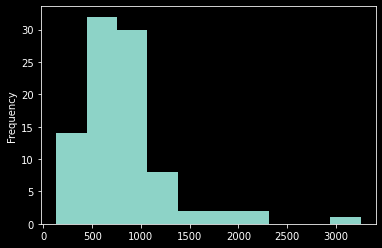

In [148]:
print(f'Média: {censo_basico_selecao["V002"].mean():.2f} \nDesvio Parão: {censo_basico_selecao["V002"].std():.2f}')

censo_basico_selecao['V002'].plot.hist()
plt.show()

## Pergunta 12
**Qual é a média de pessoas alfabetizadas responsáveis do sexo feminino dos setores censitários que contêm empresas da sua carteira de clientes? Descreva como obteve essas informações (tabelas e racional das fórmulas e procedimentos).**

* Arquivo Responsável pelo domicílio, mulheres (planilha Responsável01_UF.xls ou Responsavel01_UF.csv)
* V093: Pessoas alfabetizadas responsáveis, do sexo feminino

Ler arquivos FTP

In [149]:
arq_responsavel_01 = []

for i in pastas:
    arq_responsavel_01.append(
        pd.read_excel(
            os.path.join('DadosCenso' ,pastas[i], 'EXCEL', f'Responsavel01_{i}.xls'), 
            index_col = 'Cod_setor',
            na_values = ['XX', 'X'],
        )
    )
    
    
censo_reponsavel01 = pd.concat(arq_responsavel_01)

Selecionar regiões censitárias com empresa da base

In [150]:
censo_reponsavel01_selecao = censo_reponsavel01[
    censo_reponsavel01.index.isin(join_setores['CD_GEOCODI'])
    ]

Resultados

Média: 106.89 
Desvio Parão: 65.62


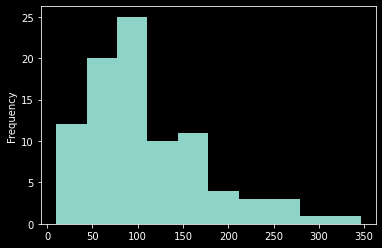

In [151]:
print(f'Média: {censo_reponsavel01_selecao["V093"].mean():.2f} \nDesvio Parão: {censo_reponsavel01_selecao["V093"].std():.2f}')

censo_reponsavel01_selecao['V093'].plot.hist()
plt.show()

## Pergunta 13
**Qual é a média e a variância das mulheres pardas alfabetizadas de 40 a 44 anos de idade dos setores censitários que contêm empresas da sua carteira de clientes? Descreva como obteve essas informações (tabelas e racional das fórmulas e procedimentos).**

* Arquivo Cor ou Raça, alfabetização, idade e gênero (planilha Pessoa04_UF.xls ou Pessoa04_UF.csv)
* V129: Pessoas alfabetizadas de 40 a 44 anos de idade, do sexo feminino e cor ou raça – parda

Ler arquivos FTP

In [152]:
arq_pessoas_04 = []

for i in pastas:
    arq_pessoas_04.append(
        pd.read_excel(
            os.path.join('DadosCenso' ,pastas[i], 'EXCEL', f'Pessoa04_{i}.xls'), 
            index_col = 'Cod_setor',
            na_values = ['XX', 'X'],
        )
    )
    
    
censo_pessoas04 = pd.concat(arq_pessoas_04)

Selecionar regiões censitárias com empresa da base

In [153]:
censo_pessoas04_selecao = censo_pessoas04[
    censo_pessoas04.index.isin(join_setores['CD_GEOCODI'])
    ]

Resultados

Média: 11.72 
Desvio Parão: 9.13


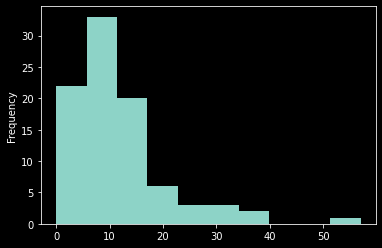

In [154]:
print(f'Média: {censo_pessoas04_selecao["V129"].mean():.2f} \nDesvio Parão: {censo_pessoas04_selecao["V129"].std():.2f}')

censo_pessoas04_selecao['V129'].plot.hist()
plt.show()

## Tarefa 14
**Apresente três mapas temáticos contendo todos os setores censitários dos Estados (UFs) do Brasil que você extraiu do site FTP do IBGE (ftp://geoftp.ibge.gov.br) apresentados de acordo com as três variáveis que você construiu para responder às perguntas 11, 12 e 13.**

##### #11

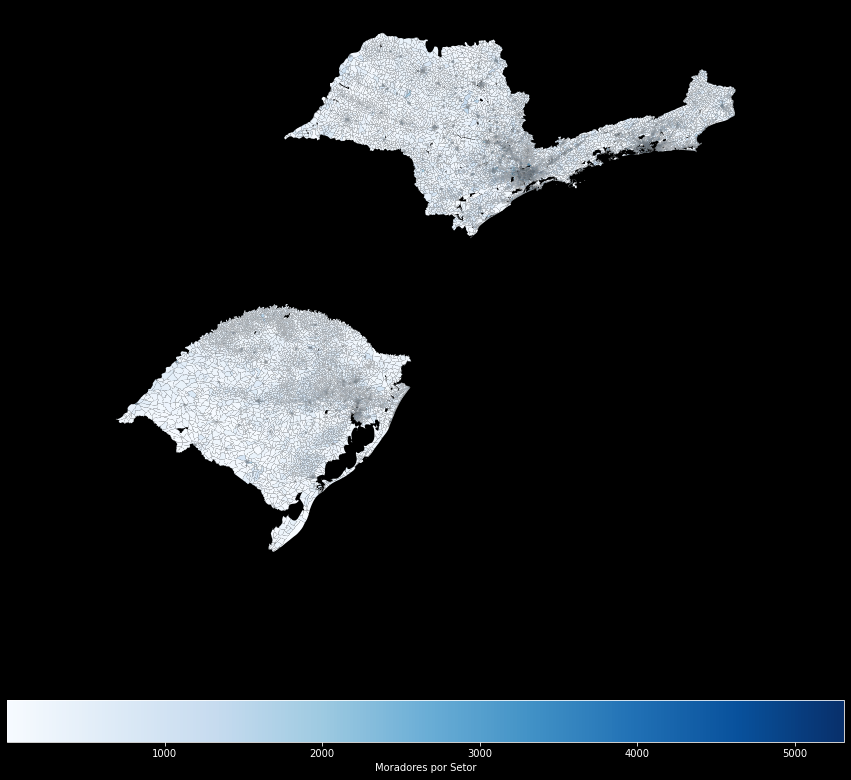

In [155]:
merged = pd.merge(
            setores,
            censo_basico,
            left_on='CD_GEOCODI',
            right_index=True,
            how = 'left'
        )

ax = merged.plot(column = 'V002', figsize = (15,15), label = 'Moradores', legend = True, cmap = 'Blues',
                legend_kwds={'label': "Moradores por Setor", 'orientation': "horizontal"}
                )

ax.set_axis_off()

plt.show()

##### #12

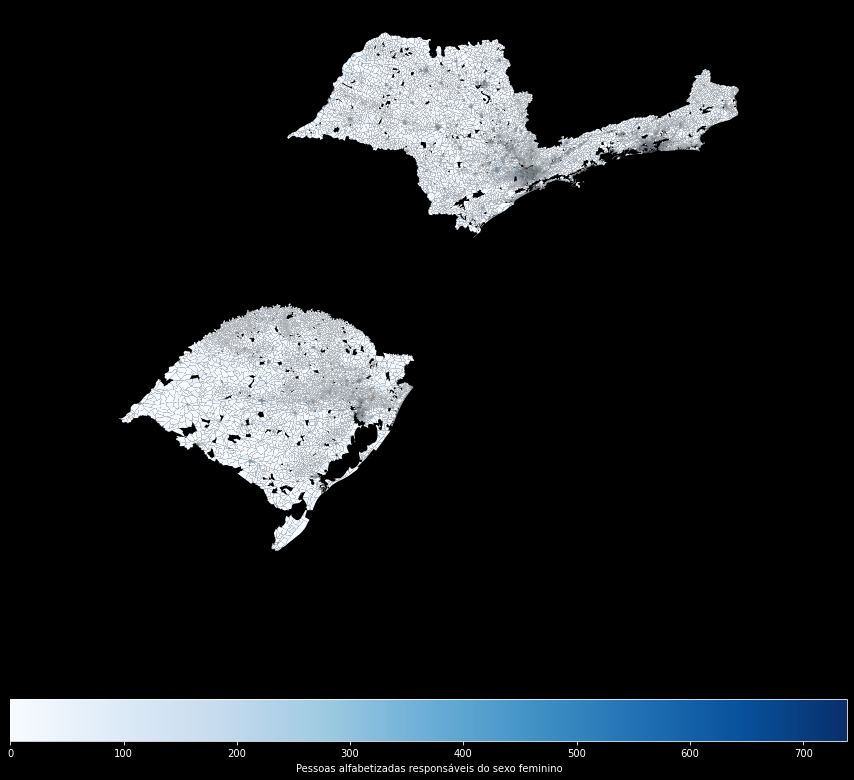

In [156]:
merged = pd.merge(
            setores,
            censo_reponsavel01,
            left_on='CD_GEOCODI',
            right_index=True,
            how = 'left'
        )

ax = merged.plot(column = 'V093', figsize = (15,15), label = 'Moradores', legend = True, cmap = 'Blues',
                legend_kwds={'label': "Pessoas alfabetizadas responsáveis do sexo feminino", 'orientation': "horizontal"}
                )

ax.set_axis_off()

plt.show()

##### #13

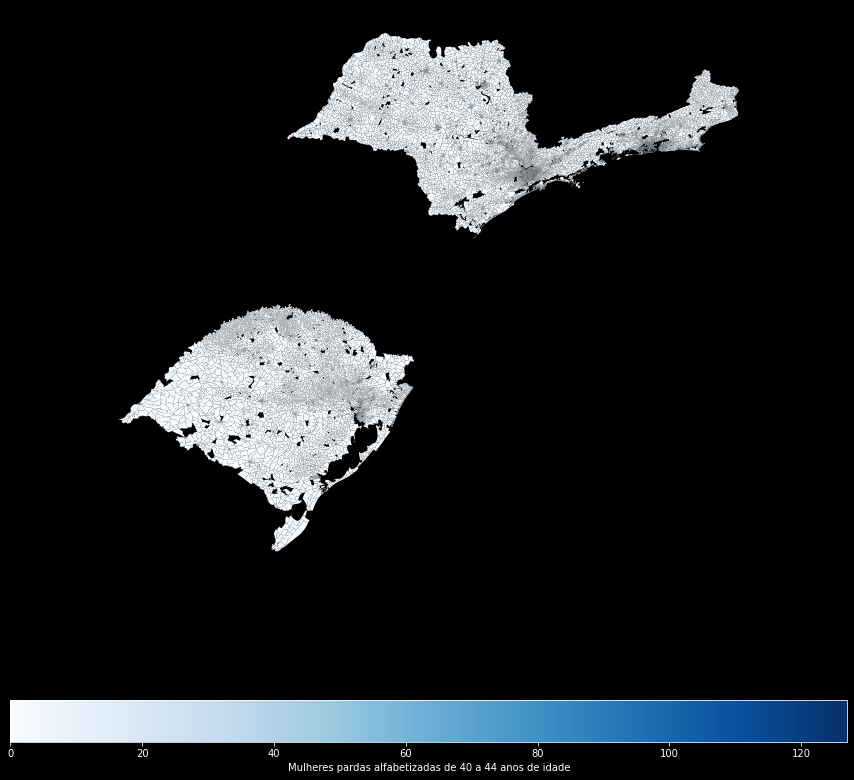

In [157]:
merged = pd.merge(
            setores,
            censo_pessoas04,
            left_on='CD_GEOCODI',
            right_index=True,
            how = 'left'
        )

ax = merged.plot(column = 'V129', figsize = (15,15), label = 'Moradores', legend = True, cmap = 'Blues',
                legend_kwds={'label': "Mulheres pardas alfabetizadas de 40 a 44 anos de idade", 'orientation': "horizontal"}
                )

ax.set_axis_off()

plt.show()